In [1]:
import os
from pathlib import Path

import torch
import numpy as np
import matplotlib.pyplot as plt

from datasets import Image
# or "import datasets" if you want to refer to it as `datasets`


In [2]:
from traverse_dataset_byTimur import TraverseDatasetFactory
# print(dir(traverse_dataset_byTimur))

Module loaded!
Module contents: ['Any', 'Callable', 'PIL', 'Path', 'TransformsWrapper', 'TraverseDatasetFactory', '_IMAGE_KEY', '_LABELS_KEY', '_MASK_KEY', '_PIXELS_KEY', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'datasets', 'np', 'torch']


In [3]:
def dummy_processor(images, masks):
    # Convert to torch tensors just as an example
    pixel_tensors = [torch.tensor(img, dtype=torch.float32) for img in images]
    mask_tensors  = [torch.tensor(msk, dtype=torch.long) for msk in masks]

    return {
        "pixel_values": pixel_tensors,
        "labels": mask_tensors,
    }

import albumentations as A

augmentations = A.Compose([
    A.RandomResizedCrop(height=256, width=256),
    A.HorizontalFlip(p=0.5),
])

In [4]:
dataset_factory = TraverseDatasetFactory(
    processor=dummy_processor,    # or None
    augmentations=None,  # or None
    val_fraction=0.2              # 20% of your data becomes "val"
)

train_dataset = dataset_factory("/mnt/vol0/datasets/egowalk/traverse", "train")
val_dataset   = dataset_factory("/mnt/vol0/datasets/egowalk/traverse", "val")

In [12]:
print("Train dataset size:", len(train_dataset))
print("Val dataset size:", len(val_dataset))

# dataset features
print(train_dataset.features)

sample = train_dataset[148]
print(sample.keys())

pixel_values = sample["pixel_values"]   # E.g., a torch.Tensor
labels       = sample["labels"]         # E.g., a torch.Tensor

print("Pixel values shape:", pixel_values.shape)
print("Labels shape:", labels.shape)

Train dataset size: 30548
Val dataset size: 7637
{'image': Image(mode=None, decode=True, id=None), 'mask': Image(mode=None, decode=True, id=None)}
dict_keys(['mask', 'image', 'pixel_values', 'labels'])
Pixel values shape: torch.Size([600, 960, 3])
Labels shape: torch.Size([600, 960])


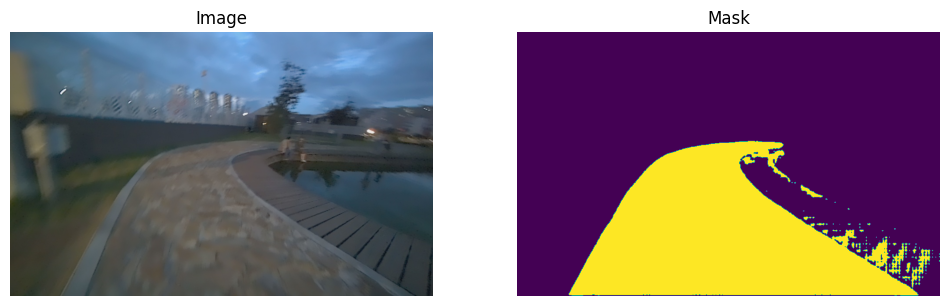

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 'image' is a PIL.Image, so we can show it directly
ax[0].imshow(sample["image"])
ax[0].set_title("Image")
ax[0].axis("off")

# 'mask' is also a PIL.Image
ax[1].imshow(sample["mask"])
ax[1].set_title("Mask")
ax[1].axis("off")

plt.show()